## Breast Cancer Classifier
In this project, we will be using several Python libraries to make a K-Nearest Neighbor classifier that is trained to predict whether a patient has breast cancer.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline

### Load data

In [7]:
breast_cancer_data = load_breast_cancer()

In [8]:
#print data and columns
print(breast_cancer_data.data[0])
print(breast_cancer_data.feature_names)

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [9]:
# length rows and columns
print("rows : ", len(breast_cancer_data.data))
print("columns : ", len(breast_cancer_data.feature_names))

rows :  569
columns :  30


In [10]:
# see what we classify
print(breast_cancer_data.target)
print(breast_cancer_data.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

this data works respectively.
- 0 : malignant
- 1 : benign

### Spliting The Data Into Training and Validation Sets

In [12]:
training_data, validation_data, training_labels, validation_labels = train_test_split(
    breast_cancer_data.data,
    breast_cancer_data.target,
    test_size = 0.2,
    random_state = 100
)

# confirm that worked correctly
print(len(training_data))
print(len(training_labels))

455
455


### Running The Classifier

In [13]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(training_data, training_labels)
print(classifier.score(validation_data, validation_labels))

0.9473684210526315


The classifier does pretty well when k=3 (the validation is 94%). Maybe there is a better k!

In [16]:
# loop for k 1 through 100
for k in range(1, 101):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(training_data, training_labels)
    print(classifier.score(validation_data, validation_labels))

0.9298245614035088
0.9385964912280702
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.9649122807017544
0.9649122807017544
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.9473684210526315
0.956140350877193
0.9473684210526315
0.956140350877193
0.956140350877193
0.956140350877193
0.956140350877193
0.9473684210526315
0.9473684210526315
0.9473684210526315
0.956140350877193
0.956

### Graphing The Results

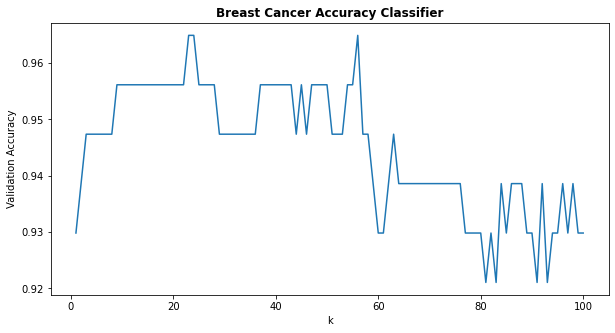

In [27]:
# x-axis values
k_list = range(1, 101)

# y-axis values
accuracies = []
for k in range(1, 101):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(training_data, training_labels)
    accuracies.append(classifier.score(validation_data, validation_labels))

# print(accuracies)

plt.figure(figsize=(10,5))
plt.plot(k_list, accuracies)
plt.title('Breast Cancer Accuracy Classifier', weight='bold')
plt.xlabel("k")
plt.ylabel('Validation Accuracy')
plt.savefig('breast_cancer.png')